# Time Series -Milk Production 


## The Data

** Source: https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line **

**Monthly milk production: pounds per cow. Jan 62 - Dec 75**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_milk = pd.read_csv('monthly-milk-production.csv', index_col='Month')

In [3]:
data_milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


** Make the index a time series by using: **

    milk.index = pd.to_datetime(milk.index)

In [4]:
data_milk.index = pd.to_datetime(data_milk.index)

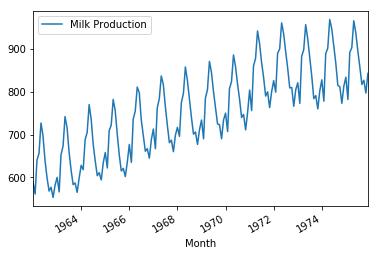

In [5]:
data_milk.plot()

### Train Test Split 

** We use last 12 months data as the test set **

In [6]:
train_set = data_milk.head(156)
test_set = data_milk.tail(12)

### Scaling the data

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
 scaler = MinMaxScaler()

In [9]:
scaled_train =  scaler.fit_transform(train_set)

In [10]:
 scaled_test = scaler.transform(test_set)

### Batch Function 

In [11]:
def nxt_batch(training_data, batch_size, steps):
    #Generate random starting points 
    rand_start = np.random.randint(0 , len(training_data) - steps)
    #
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)
    
    return y_batch[:,:-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1)

### RNN Model 

In [12]:
import tensorflow as tf

In [13]:
#Constants

num_ip = 1 
num_time_steps = 12
num_neurons = 100
num_op = 1
learning_rate = 0.01 
num_iterations = 6000
batch_size = 1


### Placeholders

In [14]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_ip])

In [15]:
 y = tf.placeholder(tf.float32, [None, num_time_steps, num_op])

In [16]:
cell = tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu)

In [17]:
cell = tf.contrib.rnn.OutputProjectionWrapper(cell, output_size=num_op )

#### Dynamic RNN

In [18]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

#### Loss Function & Optimizer 

In [19]:
loss = tf.reduce_mean(tf.square(outputs - y)) 

In [20]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

In [21]:
train = optimizer.minimize(loss)

#### Global Variables

In [22]:
init = tf.global_variables_initializer()

#### Save the model

In [23]:
saver = tf.train.Saver()

#### Session 

In [24]:
##GPU Options 
gpu_options =  tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

In [25]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for iterations in range(num_iterations):
        
        X_batch, y_batch = nxt_batch(scaled_train, batch_size, num_time_steps)
        
        sess.run(train, feed_dict={X:X_batch, y:y_batch})
        
        if iterations%100 == 0:
            mse = loss.eval(feed_dict={X:X_batch, y:y_batch})
            print(iterations, "\tMSE ", mse)
    
    saver.save(sess, "./time_series_milk_production")
    

0 	MSE  0.0328919
100 	MSE  0.0167907
200 	MSE  0.0123596
300 	MSE  0.00617016
400 	MSE  0.00295552
500 	MSE  0.00927952
600 	MSE  0.00774142
700 	MSE  0.00340428
800 	MSE  0.00770567
900 	MSE  0.00628836
1000 	MSE  0.00577955
1100 	MSE  0.00986384
1200 	MSE  0.00386588
1300 	MSE  0.00259697
1400 	MSE  0.00621199
1500 	MSE  0.00427769
1600 	MSE  0.00450484
1700 	MSE  0.00205629
1800 	MSE  0.0077075
1900 	MSE  0.0020421
2000 	MSE  0.00493815
2100 	MSE  0.00405998
2200 	MSE  0.0020493
2300 	MSE  0.00957921
2400 	MSE  0.00338549
2500 	MSE  0.0049253
2600 	MSE  0.00464465
2700 	MSE  0.00311035
2800 	MSE  0.00497977
2900 	MSE  0.00620366
3000 	MSE  0.00374717
3100 	MSE  0.0042427
3200 	MSE  0.00214975
3300 	MSE  0.000717158
3400 	MSE  0.00203397
3500 	MSE  0.00196303
3600 	MSE  0.00565665
3700 	MSE  0.00902808
3800 	MSE  0.00118623
3900 	MSE  0.00445019
4000 	MSE  0.00298557
4100 	MSE  0.00470743
4200 	MSE  0.00669454
4300 	MSE  0.00640176
4400 	MSE  0.00179536
4500 	MSE  0.0018258
4600 	MS

#### Predicting the future -> Test Data

In [26]:
test_set

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


In [27]:
scaled_test

array([[ 0.67548077],
       [ 0.55048077],
       [ 0.81490385],
       [ 0.84134615],
       [ 0.99278846],
       [ 0.92307692],
       [ 0.82451923],
       [ 0.73317308],
       [ 0.63461538],
       [ 0.65865385],
       [ 0.58653846],
       [ 0.69711538]])

#### Generate Session - (Future Session)

In [28]:
with tf.Session() as sess:
    
    saver.restore(sess,"./time_series_milk_production")
    
    train_seed = list(scaled_train[-12:])
    
    for iterations in range(12):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1,num_time_steps,1)
        
        y_pred = sess.run(outputs,feed_dict={X:X_batch})
        
        train_seed.append(y_pred[0,-1,0])
        
        

INFO:tensorflow:Restoring parameters from ./time_series_milk_production


In [46]:
y_pred[0,-1]

array([ 0.61765623], dtype=float32)

In [29]:
train_seed

[array([ 0.66105769]),
 array([ 0.54086538]),
 array([ 0.80769231]),
 array([ 0.83894231]),
 array([ 1.]),
 array([ 0.94711538]),
 array([ 0.85336538]),
 array([ 0.75480769]),
 array([ 0.62980769]),
 array([ 0.62259615]),
 array([ 0.52884615]),
 array([ 0.625]),
 0.6481564,
 0.5678091,
 0.78931069,
 0.81243026,
 0.91603148,
 0.84518611,
 0.75688481,
 0.66611791,
 0.59285629,
 0.60782051,
 0.55278772,
 0.61765623]

** The last 12 outputs in train seed are the predicted values 
They are still in scaled state, should apply inverse transform to bring them to the normal form ** 

In [30]:
results = scaler.inverse_transform(np.array(train_seed[12:]).reshape(12,1))

In [31]:
test_set['Generated'] = results

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
test_set

,Milk Production,Generated
Month,,
1975-01-01 01:00:00,834.0,822.633057
1975-02-01 01:00:00,782.0,789.208557
1975-03-01 01:00:00,892.0,881.353210
1975-04-01 01:00:00,903.0,890.971008
1975-05-01 01:00:00,966.0,934.069092
1975-06-01 01:00:00,937.0,904.597473
1975-07-01 01:00:00,896.0,867.864075
1975-08-01 01:00:00,858.0,830.105042
1975-09-01 01:00:00,817.0,799.628174


#### As we can see in the below diagram the we are overestimating the predicted values

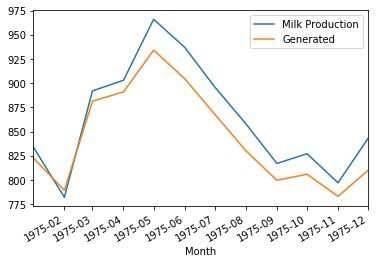

In [33]:
test_set.plot()


### To overcome the above problem we will be using the GRU cell type above 

In [34]:
import matplotlib.image as mpimage


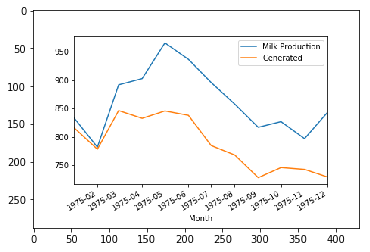

In [36]:
img = mpimage.imread('./PredictedPlot_GRUcell.png')
plt.imshow(img)